<a href="https://colab.research.google.com/github/ire-mide1/Load-Forecasting-for-Smart-Meters/blob/main/Load_Forecasting1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount= True)

Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**IMPORT AND UNDERSTAND DATA**

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/CSV files/Smart_Meters_Data.csv")
data.head()

meter_id               timestamp  current  voltage  frequency  power_factor  \
0   BED201  2022-11-10 20:55:53+01     0.65   219.98      50.17          0.88   
1   BED201  2022-11-10 20:55:05+01     0.65   219.26      50.14          0.89   
2   BED201  2022-11-10 20:54:59+01     0.68   220.02      50.15          0.86   
3   BED201  2022-11-10 20:54:10+01     0.67   220.88      50.19          0.88   
4   BED201  2022-11-10 20:54:04+01     0.65   221.76      50.17          0.89   

   energy  real_power  reactive_power  apparent_power        date      time  \
0  0.0023      126.60           68.34          143.87  11/10/2022  20:55:53   
1  0.0042      127.23           65.19          142.96  11/10/2022  20:55:05   
2  0.0062      128.29           76.11          149.17  11/10/2022  20:54:59   
3  0.0081      129.45           69.89          147.11  11/10/2022  20:54:10   
4  0.0101      128.29           65.71          144.14  11/10/2022  20:54:04   

  day_of_week    load  
0    Thursday  0.0023  
1    Thursday  0.0019  
2    Thursday  0.0020  
3    Thursday  0.0019  
4    Thursday  0.0020

In [4]:
print("="*50)
print("Information About Dataset","\n")
print(data.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(data.describe(),"\n")

print("="*50)
print("Null Values total ","\n")
print(data.isnull().sum(),"\n")

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230807 entries, 0 to 230806
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   meter_id        230807 non-null  object 
 1   timestamp       230807 non-null  object 
 2   current         230807 non-null  float64
 3   voltage         230807 non-null  float64
 4   frequency       230807 non-null  float64
 5   power_factor    230807 non-null  float64
 6   energy          230807 non-null  float64
 7   real_power      230807 non-null  float64
 8   reactive_power  230807 non-null  float64
 9   apparent_power  230807 non-null  float64
 10  date            230807 non-null  object 
 11  time            230807 non-null  object 
 12  day_of_week     230807 non-null  object 
 13  load            230807 non-null  float64
dtypes: float64(9), object(5)
memory usage: 24.7+ MB
None 

Describe the Dataset  

             current        voltage      

**CONVERT TIMESTAMP**

In [5]:
# Extract all Data Like Year MOnth Day Time etc

data["Month"] = pd.to_datetime(data["timestamp"]).dt.month
data["Year"] = pd.to_datetime(data["timestamp"]).dt.year
data["Date"] = pd.to_datetime(data["timestamp"]).dt.date
data["Time"] = pd.to_datetime(data["timestamp"]).dt.time
data["Week"] = pd.to_datetime(data["timestamp"]).dt.week
data["Hour"] = pd.to_datetime(data["timestamp"]).dt.hour
data["Day"] = pd.to_datetime(data["timestamp"]).dt.day_name()
data = data.set_index("timestamp")
data.index = pd.to_datetime(data.index)

<ipython-input-5-4736373f83ca>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data["Week"] = pd.to_datetime(data["timestamp"]).dt.week


In [6]:
# How many Unique Year do we Have in Dataset 
print(data.Year.unique(),"\n")
print("Total Number of Unique Year", data.Year.nunique(), "\n")

[2022 2023] 

Total Number of Unique Year 2 



#**DATA ANALYSIS OF UNCLEANED DATA**

Energy Consumption of all the meter_id

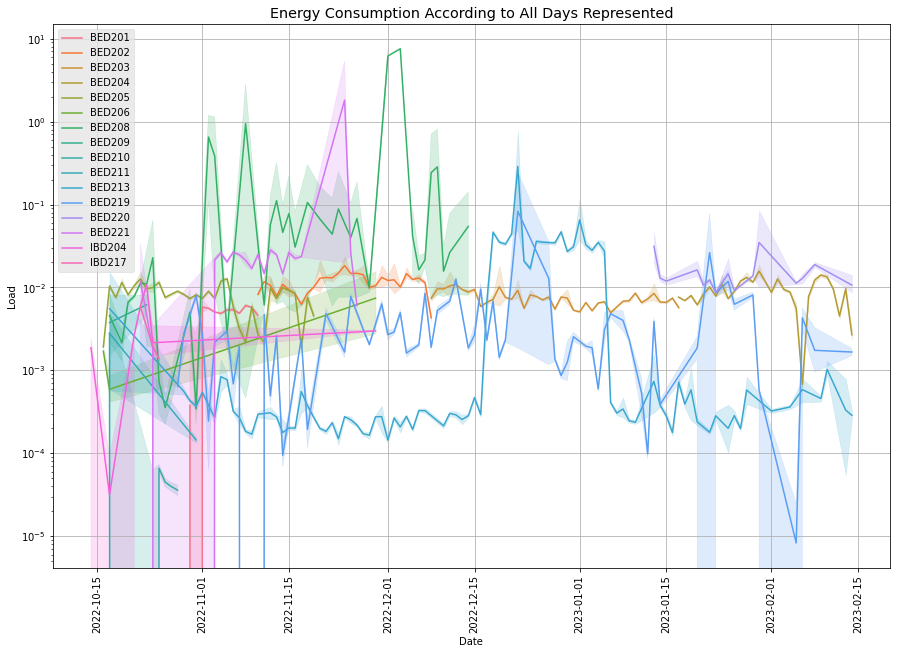

In [7]:
from matplotlib import style

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

ax =sns.lineplot(x='Date', y='load', data=data, hue ='meter_id')
#sns.set(rc={'figure.figsize':(15,6)})
ax.set_yscale('log')

plt.title("Energy Consumption According to All Days Represented")
plt.xlabel("Date")
plt.ylabel("Load")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Data Representation of each meter

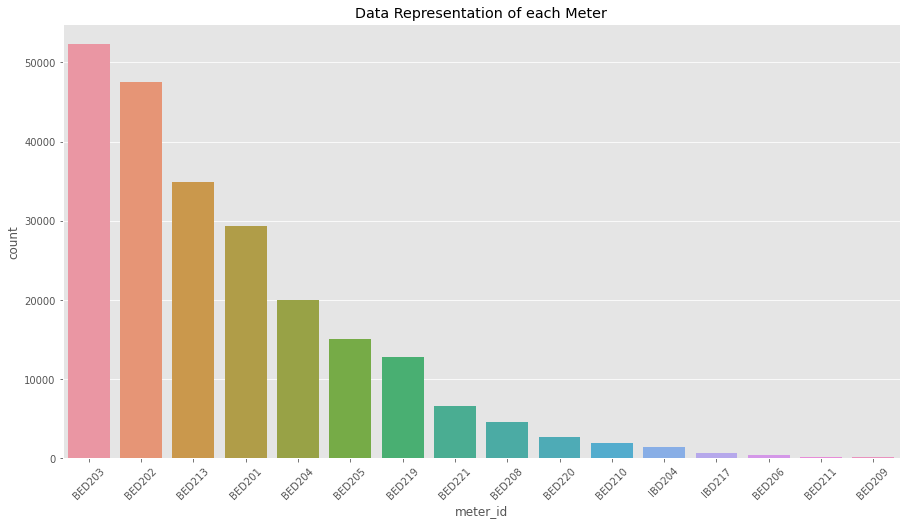

In [8]:
#uNIQUE Meter ID Count

plt.figure(figsize=(15,8))
sns.countplot(data= data, x= 'meter_id', order = data['meter_id'].value_counts().index)
plt.xticks(rotation= 45)
plt.title('Data Representation of each Meter')

plt.show()

Energy Consumption of the first most populous SIX Meter

In [9]:
#get 6 most populous data

temp_data = data.loc[(data['meter_id'] == 'BED203') |
                   (data['meter_id'] == 'BED202')|
                   (data['meter_id'] == 'BED213')|
                   (data['meter_id'] == 'BED201')|
                   (data['meter_id'] == 'BED204')|
                   (data['meter_id'] == 'BED205')]
temp_data['meter_id'].value_counts()

BED203    52287
BED202    47465
BED213    34867
BED201    29322
BED204    19971
BED205    15126
Name: meter_id, dtype: int64

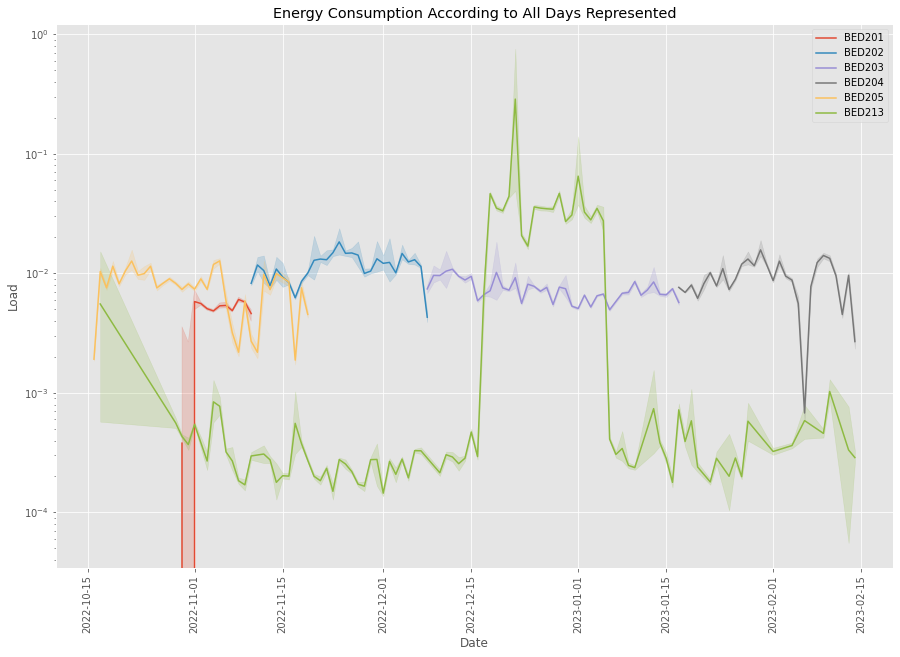

In [10]:
from matplotlib import style

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

ax =sns.lineplot(x='Date', y='load', data=temp_data, hue ='meter_id')
#sns.set(rc={'figure.figsize':(15,6)})
ax.set_yscale('log')

plt.title("Energy Consumption According to All Days Represented")
plt.xlabel("Date")
plt.ylabel("Load")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Energy Consumption of the next 7-12 populous dataset

In [11]:
#get mid populous data

temp_data_2 = data.loc[(data['meter_id'] == 'BED219') |
                   (data['meter_id'] == 'BED221')|
                   (data['meter_id'] == 'BED208')|
                   (data['meter_id'] == 'BED2220')|
                   (data['meter_id'] == 'BED210')|
                   (data['meter_id'] == 'BED204')]
temp_data_2['meter_id'].value_counts()
temp_data_2.head()

meter_id  current  voltage  frequency  power_factor  \
timestamp                                                                       
2023-01-17 14:37:21+01:00   BED204     4.64   138.60      50.12          0.94   
2023-01-17 14:37:42+01:00   BED204     4.47   145.00      50.16          0.94   
2023-01-17 14:37:58+01:00   BED204     4.52   145.16      50.11          0.94   
2023-01-17 14:38:15+01:00   BED204     4.51   128.80      50.14          0.95   
2023-01-17 14:38:36+01:00   BED204     4.37   121.54      50.14          0.95   

                             energy  real_power  reactive_power  \
timestamp                                                         
2023-01-17 14:37:21+01:00  195.3513      604.26          219.32   
2023-01-17 14:37:42+01:00  195.3423      609.26          221.13   
2023-01-17 14:37:58+01:00  195.3328      617.03          223.94   
2023-01-17 14:38:15+01:00  195.3239      552.09          181.47   
2023-01-17 14:38:36+01:00  195.3159      504.57          165.86   

                           apparent_power       date      time day_of_week  \
timestamp                                                                    
2023-01-17 14:37:21+01:00          642.83  1/17/2023  14:37:21     Tuesday   
2023-01-17 14:37:42+01:00          648.15  1/17/2023  14:37:42     Tuesday   
2023-01-17 14:37:58+01:00          656.41  1/17/2023  14:37:58     Tuesday   
2023-01-17 14:38:15+01:00          581.15  1/17/2023  14:38:15     Tuesday   
2023-01-17 14:38:36+01:00          531.13  1/17/2023  14:38:36     Tuesday   

                             load  Month  Year        Date      Time  Week  \
timestamp                                                                    
2023-01-17 14:37:21+01:00  0.0090      1  2023  2023-01-17  14:37:21     3   
2023-01-17 14:37:42+01:00  0.0095      1  2023  2023-01-17  14:37:42     3   
2023-01-17 14:37:58+01:00  0.0089      1  2023  2023-01-17  14:37:58     3   
2023-01-17 14:38:15+01:00  0.0080      1  2023  2023-01-17  14:38:15     3   
2023-01-17 14:38:36+01:00  0.0072      1  2023  2023-01-17  14:38:36     3   

                           Hour      Day  
timestamp                                 
2023-01-17 14:37:21+01:00    14  Tuesday  
2023-01-17 14:37:42+01:00    14  Tuesday  
2023-01-17 14:37:58+01:00    14  Tuesday  
2023-01-17 14:38:15+01:00    14  Tuesday  
2023-01-17 14:38:36+01:00    14  Tuesday

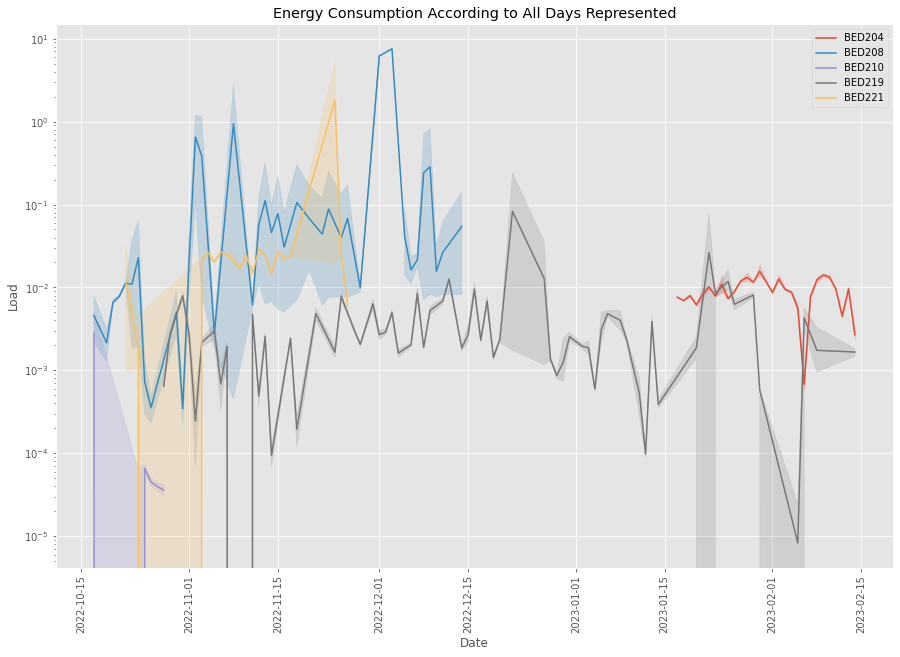

In [12]:
from matplotlib import style

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

ax =sns.lineplot(x='Date', y='load', data=temp_data_2, hue ='meter_id')
#sns.set(rc={'figure.figsize':(15,6)})
ax.set_yscale('log')

plt.title("Energy Consumption According to All Days Represented")
plt.xlabel("Date")
plt.ylabel("Load")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Energy Consumption of last four data

In [13]:
#get last 4 populous data

temp_data_3 = data.loc[(data['meter_id'] == 'IBD217') |
                   (data['meter_id'] == 'BED206')|
                   (data['meter_id'] == 'BED211')|
                   (data['meter_id'] == 'BED209')]
temp_data_3['meter_id'].value_counts()

IBD217    716
BED206    428
BED211    172
BED209    122
Name: meter_id, dtype: int64

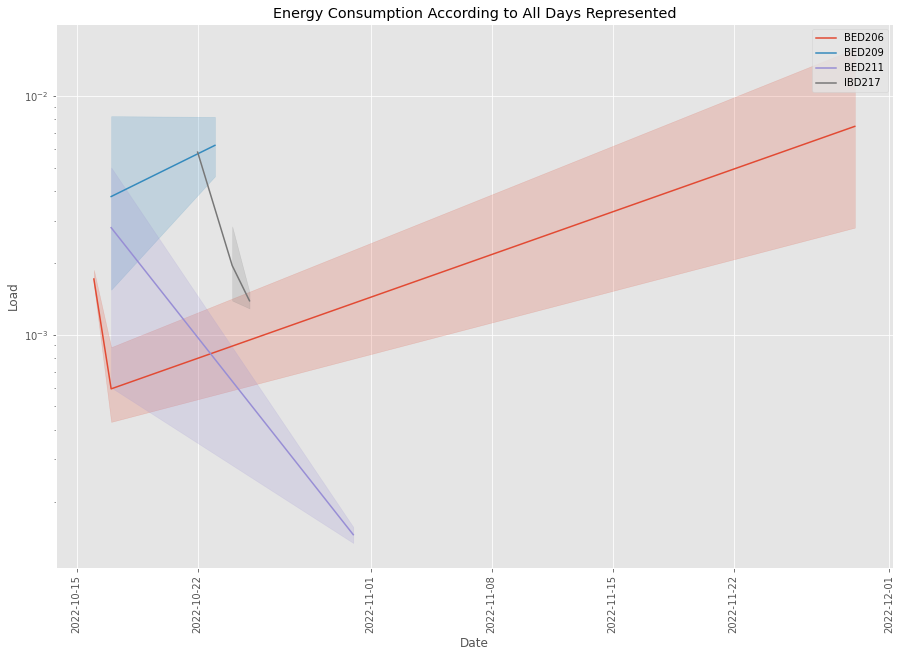

In [14]:
from matplotlib import style

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

ax =sns.lineplot(x='Date', y='load', data=temp_data_3, hue ='meter_id')
#sns.set(rc={'figure.figsize':(15,6)})
ax.set_yscale('log')

plt.title("Energy Consumption According to All Days Represented")
plt.xlabel("Date")
plt.ylabel("Load")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

**Understand the Relationship between Real, Apparent and Reactive Power**

In [15]:
#Used Meter_ID 202 because it is well represented in 2022 has more real power=0

temp_data_4 = data[data.meter_id== 'BED202']
temp_data_44= temp_data_4.groupby('Date').min()
temp_data_44 = temp_data_4.drop(['meter_id', 'day_of_week', 'Day', 'time', 'Time', 'date'], axis=1) #drop columns that are object. I cant scale because all columns cos all min will be 0 and i wont be abl to explicitly see real power = 0 
temp_data_44.head()

current  voltage  frequency  power_factor  \
timestamp                                                              
2022-11-10 20:55:59+01:00     3.72   235.10      50.17          0.60   
2022-11-10 20:56:47+01:00     3.72   235.30      50.19          0.60   
2022-11-10 20:56:53+01:00     3.73   235.18      50.18          0.60   
2022-11-10 20:57:41+01:00     3.72   234.80      50.25          0.60   
2022-11-10 20:57:47+01:00     3.76   235.38      50.29          0.61   

                             energy  real_power  reactive_power  \
timestamp                                                         
2022-11-10 20:55:59+01:00  583.5142      524.18          698.90   
2022-11-10 20:56:47+01:00  583.5063      525.75          701.01   
2022-11-10 20:56:53+01:00  583.4983      526.62          702.15   
2022-11-10 20:57:41+01:00  583.4903      524.36          699.14   
2022-11-10 20:57:47+01:00  583.4821      539.29          700.56   

                           apparent_power    load  Month  Year        Date  \
timestamp                                                                    
2022-11-10 20:55:59+01:00          873.63  0.0079     11  2022  2022-11-10   
2022-11-10 20:56:47+01:00          876.26  0.0080     11  2022  2022-11-10   
2022-11-10 20:56:53+01:00          877.69  0.0080     11  2022  2022-11-10   
2022-11-10 20:57:41+01:00          873.93  0.0082     11  2022  2022-11-10   
2022-11-10 20:57:47+01:00          884.09  0.0082     11  2022  2022-11-10   

                           Week  Hour  
timestamp                              
2022-11-10 20:55:59+01:00    45    20  
2022-11-10 20:56:47+01:00    45    20  
2022-11-10 20:56:53+01:00    45    20  
2022-11-10 20:57:41+01:00    45    20  
2022-11-10 20:57:47+01:00    45    20

In [16]:
##2#Used Meter_ID 213 because it is well represented across the years and has 0 real power

#temp_data_4 = data[data.meter_id== 'BED202']
#temp_data_44 = temp_data_4.drop(['meter_id', 'day_of_week', 'Day', 'time', 'Time', 'date'], axis=1)
#temp_data_44= temp_data_44.set_index('Date')
#temp_data_44.head()

In [17]:
temp_data_44.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47465 entries, 2022-11-10 20:55:59+01:00 to 2022-12-08 10:35:44+01:00
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   current         47465 non-null  float64
 1   voltage         47465 non-null  float64
 2   frequency       47465 non-null  float64
 3   power_factor    47465 non-null  float64
 4   energy          47465 non-null  float64
 5   real_power      47465 non-null  float64
 6   reactive_power  47465 non-null  float64
 7   apparent_power  47465 non-null  float64
 8   load            47465 non-null  float64
 9   Month           47465 non-null  int64  
 10  Year            47465 non-null  int64  
 11  Date            47465 non-null  object 
 12  Week            47465 non-null  int64  
 13  Hour            47465 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 5.4+ MB


In [18]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#temp_data_4 = scaler.fit_transform(temp_data_44)
#temp_data_4 = pd.DataFrame(temp_data_4, columns=temp_data_44.columns, index=temp_data_44.index)

#temp_data_4.head()

In [19]:
temp_data_44.describe()

current       voltage     frequency  power_factor        energy  \
count  47465.000000  47465.000000  47465.000000  47465.000000  47465.000000   
mean       3.884741    234.575523     50.160169      0.636978    303.872518   
std        1.752564      7.566828      0.211075      0.113250    175.326140   
min        0.470000     74.520000     49.010000      0.000000      0.009300   
25%        3.160000    230.940000     50.090000      0.560000    149.862500   
50%        3.540000    235.400000     50.180000      0.640000    316.522300   
75%        4.100000    239.120000     50.280000      0.710000    463.755100   
max       25.600000    255.060000     51.120000      0.960000    583.514200   

         real_power  reactive_power  apparent_power          load  \
count  47465.000000    47465.000000    47465.000000  47465.000000   
mean     599.033124      667.848906      910.116612      0.011886   
std      379.796909      205.871759      403.954226      0.046771   
min        0.000000       58.800000       82.350000     -0.066000   
25%      417.740000      582.860000      739.490000      0.006500   
50%      504.320000      647.710000      833.660000      0.008000   
75%      655.160000      735.320000      968.420000      0.011200   
max     5548.750000     2036.110000     5840.780000      4.566300   

              Month     Year          Week          Hour  
count  47465.000000  47465.0  47465.000000  47465.000000  
mean      11.278184   2022.0     47.035900      9.557063  
std        0.448109      0.0      1.227381      7.100637  
min       11.000000   2022.0     45.000000      0.000000  
25%       11.000000   2022.0     46.000000      3.000000  
50%       11.000000   2022.0     47.000000      9.000000  
75%       12.000000   2022.0     48.000000     15.000000  
max       12.000000   2022.0     49.000000     23.000000

In [20]:
temp_data_44.index

DatetimeIndex(['2022-11-10 20:55:59+01:00', '2022-11-10 20:56:47+01:00',
               '2022-11-10 20:56:53+01:00', '2022-11-10 20:57:41+01:00',
               '2022-11-10 20:57:47+01:00', '2022-11-10 20:58:35+01:00',
               '2022-11-10 20:58:41+01:00', '2022-11-10 20:59:29+01:00',
               '2022-11-10 20:59:35+01:00', '2022-11-10 21:00:29+01:00',
               ...
               '2022-12-08 10:27:37+01:00', '2022-12-08 10:28:31+01:00',
               '2022-12-08 10:29:25+01:00', '2022-12-08 10:30:19+01:00',
               '2022-12-08 10:31:13+01:00', '2022-12-08 10:32:08+01:00',
               '2022-12-08 10:33:02+01:00', '2022-12-08 10:33:56+01:00',
               '2022-12-08 10:34:50+01:00', '2022-12-08 10:35:44+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='timestamp', length=47465, freq=None)

(-200.0, 1000.0)

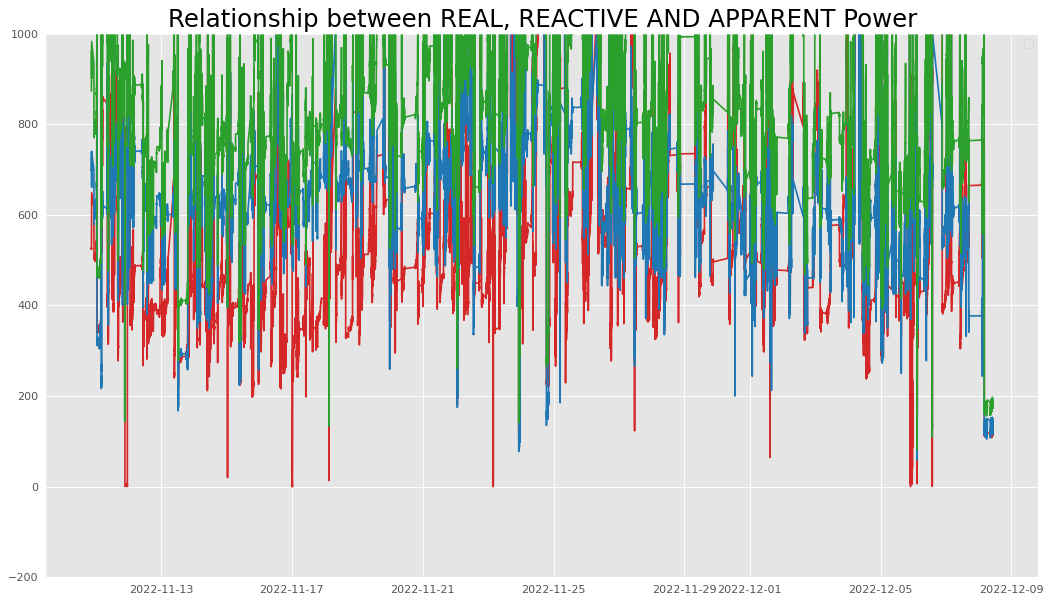

In [21]:
#**Relationship between REAL, REACTIVE AND APPARENT**#

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = temp_data_44.columns[5:8]  
for i, column in enumerate(columns):    
    plt.plot(temp_data_44.index, temp_data_44[column].values, lw=1.5, color=mycolors[i])    

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Relationship between REAL, REACTIVE AND APPARENT Power', fontsize=22)
plt.legend()
plt.ylim(-200, 1000)    

**Energy Consumption Each Year**

In [22]:

#GroupBy Meter_ID and print the first entries in all the groups formed.

data_grp = data.groupby('meter_id')
data_grp.first()

current  voltage  frequency  power_factor    energy  real_power  \
meter_id                                                                    
BED201       0.65   219.98      50.17          0.88    0.0023      126.60   
BED202       3.72   235.10      50.17          0.60  583.5142      524.18   
BED203       2.26   194.30      50.25          0.78  120.0112      341.91   
BED204       4.64   138.60      50.12          0.94  195.3513      604.26   
BED205       1.28   270.50      57.28          0.62  116.3393      215.34   
BED206       2.28   219.82      49.83          0.34    0.7335      170.11   
BED208       3.12   177.48      50.23          0.81  196.6493      448.53   
BED209       2.75   183.36      50.31          0.75    0.7432      377.90   
BED210       0.07   209.48      50.28          0.31    0.1106        4.29   
BED211       1.24   196.50      49.69          0.05    0.0318       12.22   
BED213       0.20   232.92      50.67          0.14    0.2218        6.59   
BED219       0.16   216.44      50.17          0.76   50.0077       26.65   
BED220       2.98   169.90      50.17          0.98   37.0646      496.51   
BED221       3.68   201.70      49.95          0.78  163.0274      578.65   
IBD204       0.87   221.16      49.83          1.00    5.5051      192.85   
IBD217       0.45   218.60      49.83          0.99    1.1024       98.25   

          reactive_power  apparent_power        date      time day_of_week  \
meter_id                                                                     
BED201             68.34          143.87  11/10/2022  20:55:53    Thursday   
BED202            698.90          873.63  11/10/2022  20:55:59    Thursday   
BED203            274.30          438.34   12/8/2022  10:37:32    Thursday   
BED204            219.32          642.83   1/17/2023  14:37:21     Tuesday   
BED205            272.51          347.32  11/19/2022  22:45:12    Saturday   
BED206            470.50          500.31  11/29/2022  14:46:07     Tuesday   
BED208            324.73          553.74  12/14/2022  16:23:21   Wednesday   
BED209            333.28          503.87  10/23/2022  17:12:10      Sunday   
BED210             13.15           13.83  10/28/2022  14:25:35      Friday   
BED211            244.14          244.45  10/31/2022  14:43:05      Monday   
BED213             46.59           47.05   2/14/2023  10:36:20     Tuesday   
BED219             22.78           35.06   2/14/2023  11:58:41     Tuesday   
BED220            100.81          506.64   2/14/2023  11:58:40     Tuesday   
BED221            464.23          741.85  11/26/2022   1:42:16    Saturday   
IBD204              0.00          192.85  11/29/2022  13:49:25     Tuesday   
IBD217             13.98           99.24  10/25/2022  13:43:02     Tuesday   

            load  Month  Year        Date      Time  Week  Hour        Day  
meter_id                                                                    
BED201    0.0023     11  2022  2022-11-10  20:55:53    45    20   Thursday  
BED202    0.0079     11  2022  2022-11-10  20:55:59    45    20   Thursday  
BED203    0.0053     12  2022  2022-12-08  10:37:32    49    10   Thursday  
BED204    0.0090      1  2023  2023-01-17  14:37:21     3    14    Tuesday  
BED205    0.0032     11  2022  2022-11-19  22:45:12    46    22   Saturday  
BED206    0.0028     11  2022  2022-11-29  14:46:07    48    14    Tuesday  
BED208    0.0138     12  2022  2022-12-14  16:23:21    50    16  Wednesday  
BED209    0.0061     10  2022  2022-10-23  17:12:10    42    17     Sunday  
BED210    0.0002     10  2022  2022-10-28  14:25:35    43    14     Friday  
BED211    0.0002     10  2022  2022-10-31  14:43:05    44    14     Monday  
BED213    0.0004      2  2023  2023-02-14  10:36:20     7    10    Tuesday  
BED219    0.0005      2  2023  2023-02-14  11:58:41     7    11    Tuesday  
BED220    0.0078      2  2023  2023-02-14  11:58:40     7    11    Tuesday  
BED221    0.0057     11  2022  2022-11-26  01:42:16    47     1

Energy consumption of BED213

In [23]:
#Analysis energy consumption of BED213 for 2022 and 2023 because it is well represented

grp_213 = data_grp.get_group('BED213') #collect data 
#table_202 = grp_202.groupby(['date', 'hour']).mean() #groupby
#table_202

<ipython-input-24-5ea4d54c577d>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2022 = grp_213["2022"]["energy"].to_list()
<ipython-input-24-5ea4d54c577d>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2022 = grp_213["2022"]["Date"].to_list()
<ipython-input-24-5ea4d54c577d>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2023 = grp_213["2023"]["energy"].to_list()
<ipython-input-24-5ea4d54c577d>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single s

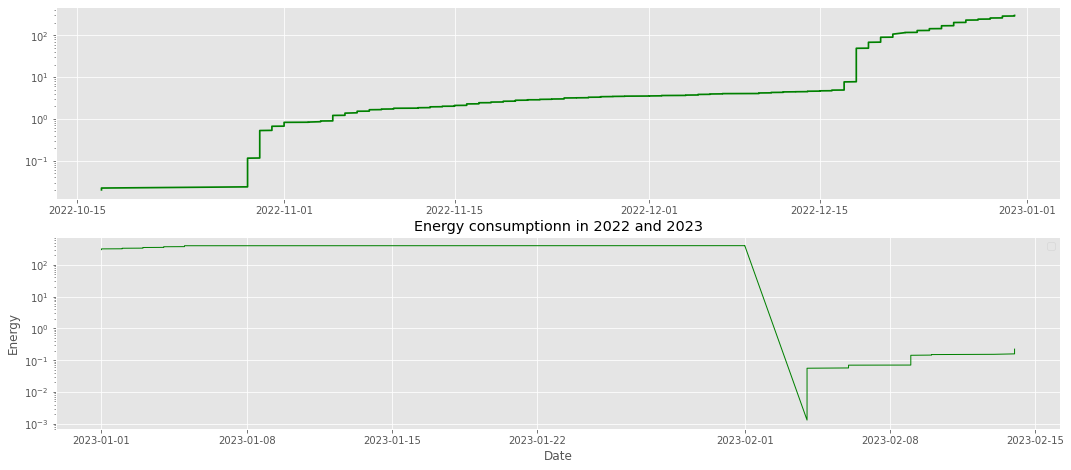

In [24]:
from matplotlib import style

fig = plt.figure(figsize=(18,12))

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)

style.use('ggplot')

y_2022 = grp_213["2022"]["energy"].to_list()
x_2022 = grp_213["2022"]["Date"].to_list()
ax1.plot(x_2022,y_2022, color="green", linewidth=1.7)
ax1.set_yscale('log')

y_2023 = grp_213["2023"]["energy"].to_list()
x_2023 = grp_213["2023"]["Date"].to_list()
ax2.plot(x_2023, y_2023, color="green", linewidth=1)
ax2.set_yscale('log')



plt.rcParams["figure.figsize"] = (18,12)
plt.title("Energy consumptionn in 2022 and 2023")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.grid(True, alpha=1)
plt.legend()

Energy consumption of all meters

<ipython-input-25-6cc3d69c83f9>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2022 = data["2022"]["energy"].to_list()
<ipython-input-25-6cc3d69c83f9>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2022 = data["2022"]["Date"].to_list()
<ipython-input-25-6cc3d69c83f9>:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2023 = data["2023"]["energy"].to_list()
<ipython-input-25-6cc3d69c83f9>:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to 

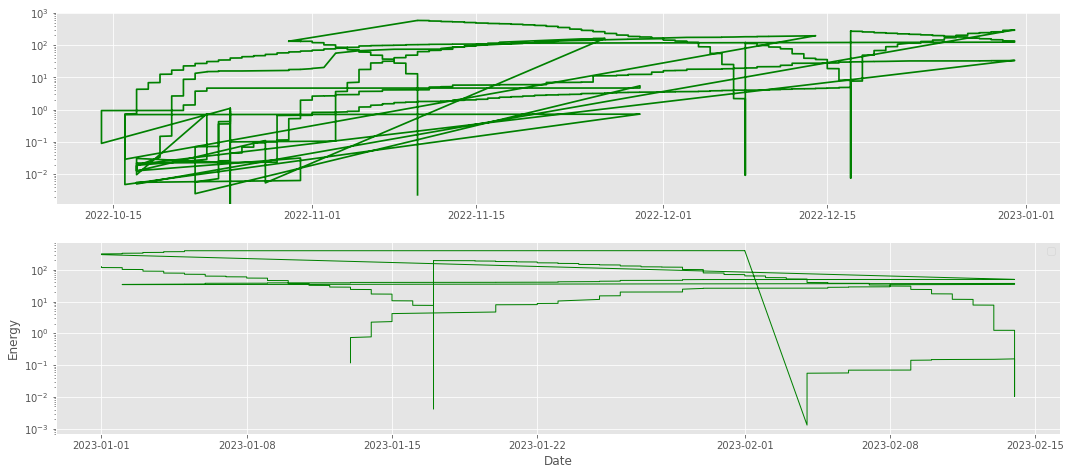

In [25]:
#Energy Consumption for all meters in 2022 and 2023
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)


style.use('ggplot')

y_2022 = data["2022"]["energy"].to_list()
x_2022 = data["2022"]["Date"].to_list()
ax1.plot(x_2022,y_2022, color="green", linewidth=1.7)
ax1.set_yscale('log')

y_2023 = data["2023"]["energy"].to_list()
x_2023 = data["2023"]["Date"].to_list()
ax2.plot(x_2023, y_2023, color="green", linewidth=1)
ax2.set_yscale('log')

plt.rcParams["figure.figsize"] = (18,12)
#plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.grid(True, alpha=1)
plt.legend()

#for label in ax1.xaxis.get_ticklabels():
#    label.set_rotation(90)

**Energy Distribution**

Energy distribution of BED213

<ipython-input-26-63660311d6ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grp_213["energy"])


Text(0.5, 1.0, 'Energy Distribution')

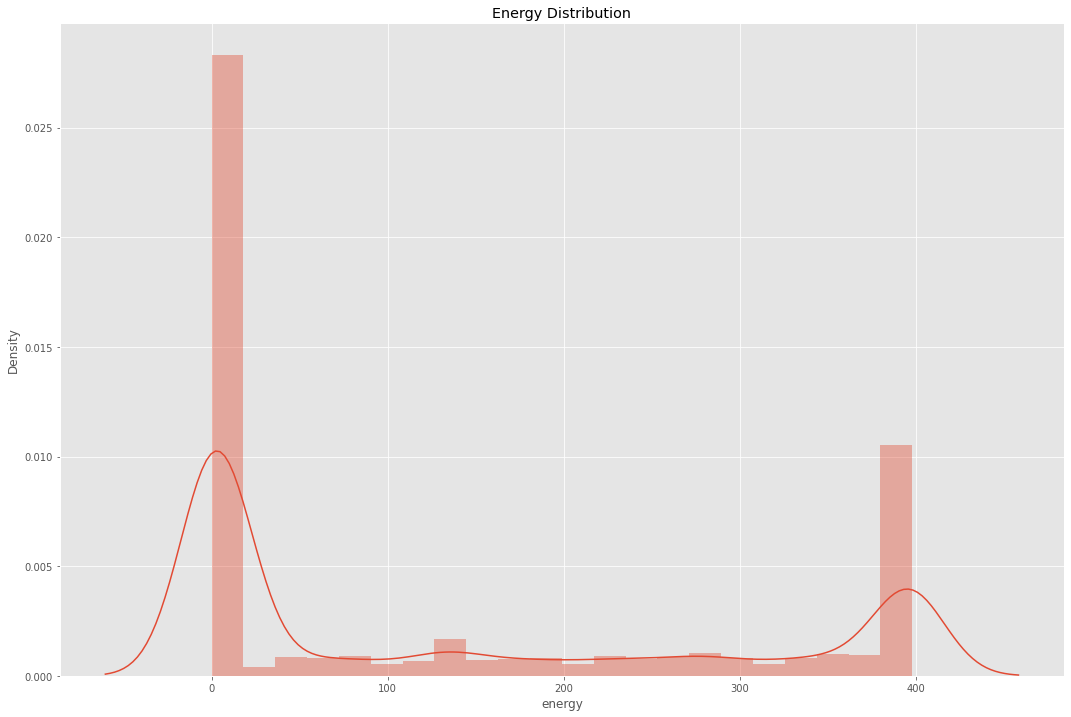

In [26]:
sns.distplot(grp_213["energy"])
plt.title("Energy Distribution")

Energy Distribution of all meters

In [27]:
sns.distplot(data["energy"])
plt.title("Energy Distribution")

<ipython-input-27-9b0533ba63c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["energy"])


Text(0.5, 1.0, 'Energy Distribution')

**Energy Consumption per Month**

In [28]:
#Energy with Respect to Month for BED213
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=grp_213["Date"],y=grp_213["load"], data=grp_213)
plt.title("Energy Consumption vs Time for BED213")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.ylim(-0.005,0.6)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [29]:
temp_data_44.head()

current  voltage  frequency  power_factor  \
timestamp                                                              
2022-11-10 20:55:59+01:00     3.72   235.10      50.17          0.60   
2022-11-10 20:56:47+01:00     3.72   235.30      50.19          0.60   
2022-11-10 20:56:53+01:00     3.73   235.18      50.18          0.60   
2022-11-10 20:57:41+01:00     3.72   234.80      50.25          0.60   
2022-11-10 20:57:47+01:00     3.76   235.38      50.29          0.61   

                             energy  real_power  reactive_power  \
timestamp                                                         
2022-11-10 20:55:59+01:00  583.5142      524.18          698.90   
2022-11-10 20:56:47+01:00  583.5063      525.75          701.01   
2022-11-10 20:56:53+01:00  583.4983      526.62          702.15   
2022-11-10 20:57:41+01:00  583.4903      524.36          699.14   
2022-11-10 20:57:47+01:00  583.4821      539.29          700.56   

                           apparent_power    load  Month  Year        Date  \
timestamp                                                                    
2022-11-10 20:55:59+01:00          873.63  0.0079     11  2022  2022-11-10   
2022-11-10 20:56:47+01:00          876.26  0.0080     11  2022  2022-11-10   
2022-11-10 20:56:53+01:00          877.69  0.0080     11  2022  2022-11-10   
2022-11-10 20:57:41+01:00          873.93  0.0082     11  2022  2022-11-10   
2022-11-10 20:57:47+01:00          884.09  0.0082     11  2022  2022-11-10   

                           Week  Hour  
timestamp                              
2022-11-10 20:55:59+01:00    45    20  
2022-11-10 20:56:47+01:00    45    20  
2022-11-10 20:56:53+01:00    45    20  
2022-11-10 20:57:41+01:00    45    20  
2022-11-10 20:57:47+01:00    45    20

In [30]:
temp_data_44 =temp_data_44.reset_index()
temp_data_44["Day"] = pd.to_datetime(temp_data_44["timestamp"]).dt.day_name()

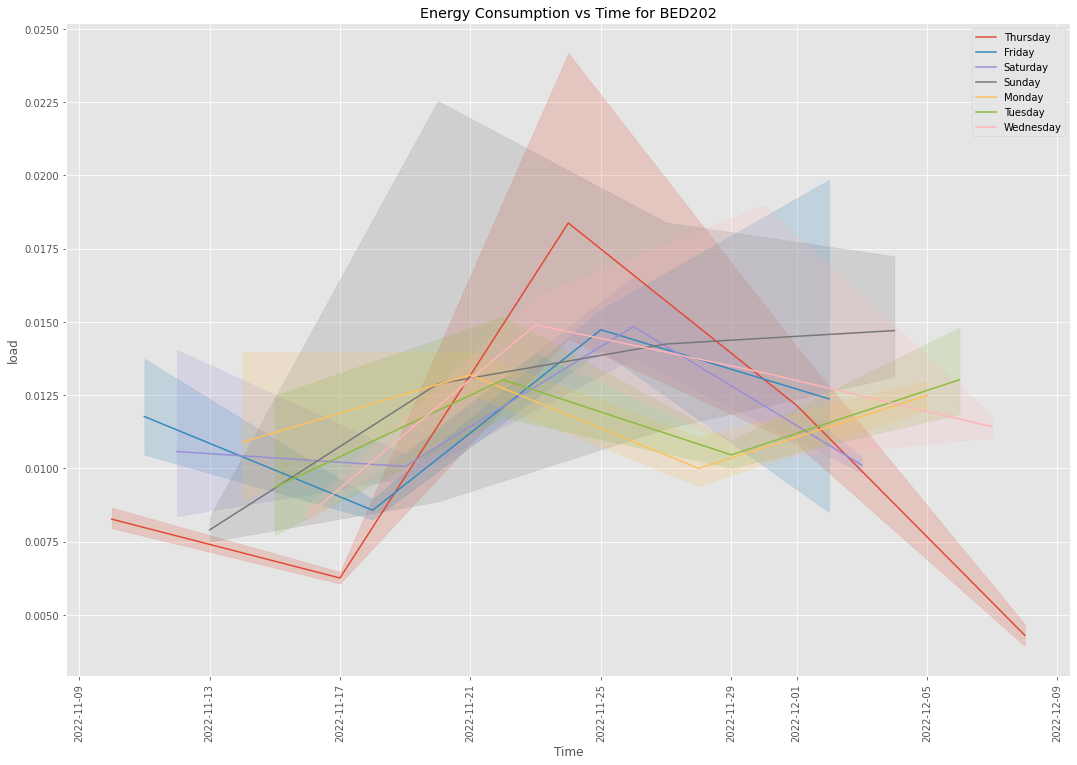

In [31]:
#Energy with Respect to Month for BED213
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=temp_data_44["Date"],y=temp_data_44["load"], data=temp_data_44, hue='Day')
plt.title("Energy Consumption vs Time for BED202")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

#Clean the Data

**Deal with Outliers/ Volaitability**

In [32]:
data_trans = data.copy()

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_trans[['current','voltage','frequency', 'power_factor',
      'energy', 'real_power', 'reactive_power', 'apparent_power', 'load']] = mms.fit_transform(data_trans[['current','voltage','frequency', 'power_factor',
                                                                                                                                                     'energy', 'real_power', 'reactive_power', 'apparent_power', 'load']])

In [34]:
 data_trans= data_trans.reset_index()

In [35]:
#data_trans= data_trans.drop(['meter_id','date', 'time', 'day_of_week', 'Month', 'Year', 'Date', 'Time', 'Week', 'Hour', 'Day'], axis=1)
data_trans = data_trans[['real_power', 'load']]
data_trans = data_trans.head(500).copy()
#data_trans = data_trans[:23080]
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   real_power  500 non-null    float64
 1   load        500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_trans[['real_power', 'load']])
distances, indices = nbrs.kneighbors(data_trans[['real_power', 'load']])
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [37]:
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
data_dbscan = data_trans[['real_power', 'load']]
model = DBSCAN(eps = 0.006, min_samples =3).fit(data_dbscan)
colors = model.labels_

Text(0.5, 1.0, 'Outliers Detection using DBSCAN')

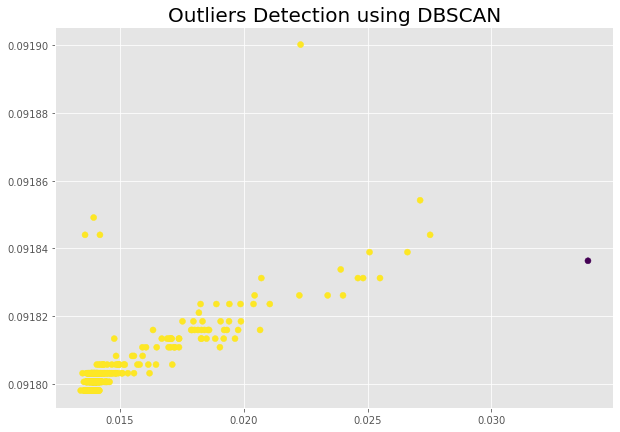

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(data_trans['real_power'], data_trans['load'], c=colors)
plt.title('Outliers Detection using DBSCAN',fontsize=20)

Not much outlier, just 1 outlier out of 500.

<Axes: title={'center': 'load'}, xlabel='meter_id'>

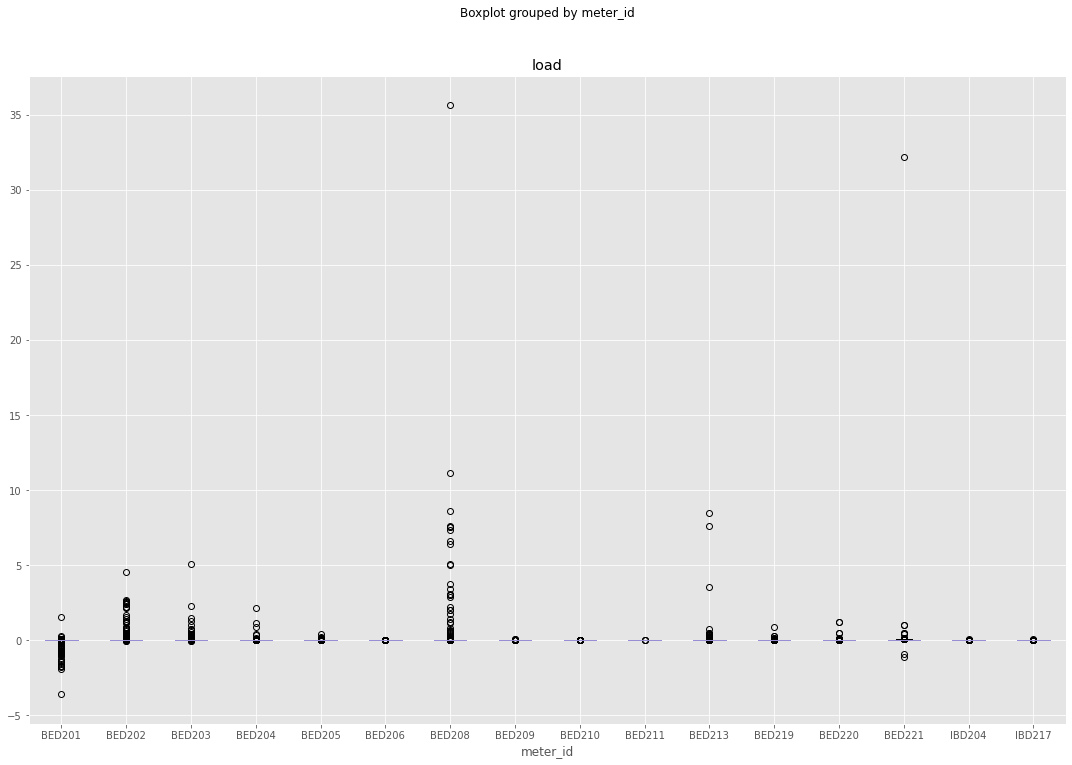

In [40]:
data.boxplot(by ='meter_id', column =['load'], grid = True)

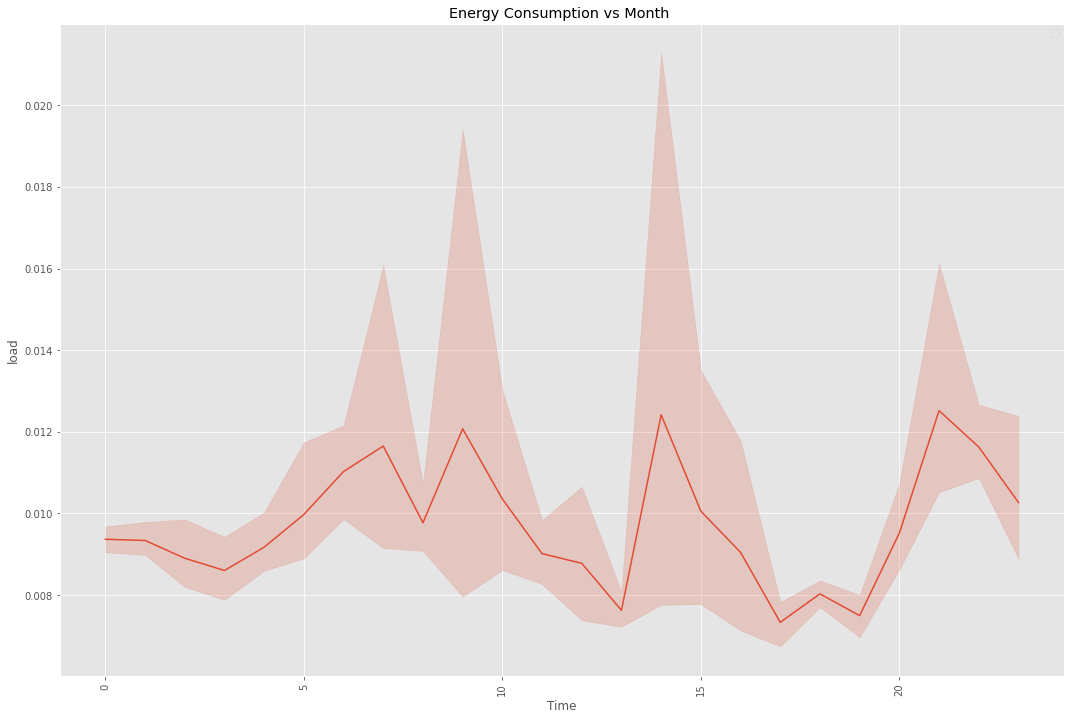

In [41]:
#Energy with Respect to Time for all meters

fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=data["Hour"],y=data["load"], data=data)
plt.title("Energy Consumption vs Month ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [42]:
import plotly.express as px
fig = px.line(data, x="Date", y="load", color='meter_id')
fig

**FEATURE EXTRACTION/PCA**

In [43]:
#get numeric data

data_num =data.reset_index()
data_num = data_num.select_dtypes(include='number')
data_num.head()

current  voltage  frequency  power_factor  energy  real_power  \
0     0.65   219.98      50.17          0.88  0.0023      126.60   
1     0.65   219.26      50.14          0.89  0.0042      127.23   
2     0.68   220.02      50.15          0.86  0.0062      128.29   
3     0.67   220.88      50.19          0.88  0.0081      129.45   
4     0.65   221.76      50.17          0.89  0.0101      128.29   

   reactive_power  apparent_power    load  Month  Year  Week  Hour  
0           68.34          143.87  0.0023     11  2022    45    20  
1           65.19          142.96  0.0019     11  2022    45    20  
2           76.11          149.17  0.0020     11  2022    45    20  
3           69.89          147.11  0.0019     11  2022    45    20  
4           65.71          144.14  0.0020     11  2022    45    20

In [44]:
X = data_num.drop('load', axis=1)
y = data_num['load']

In [45]:
#scale numeric data
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)

In [46]:
#PCA for feature extraction to reduce noisy features
#PCA assumes that features with low variance are irrelevant and features with high variance are informative.
#The n_components argument will define the number of components that we want to reduce the features to.

from sklearn.decomposition import PCA
 
pca = PCA(n_components=7)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

Shape before PCA:  (230807, 12)
Shape after PCA:  (230807, 7)


In [47]:
pca_df['target'] = y
#pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.167853 -1.125909  1.260898  0.744166  1.135119  0.506917 -1.165976   
1      -1.166121 -1.107146  1.309175  0.794285  1.084482  0.482608 -1.196974   
2      -1.162367 -1.152501  1.212523  0.781155  1.094411  0.543557 -1.076735   
3      -1.155899 -1.128040  1.238929  0.711396  1.171527  0.521156 -1.179726   
4      -1.156431 -1.122619  1.257520  0.748258  1.140711  0.522321 -1.241808   
...          ...       ...       ...       ...       ...       ...       ...   
230802 -1.300046 -0.829111  1.577327  1.156637  0.370422  0.364478 -1.687107   
230803 -1.299343 -0.828701  1.577610  1.156584  0.370409  0.364306 -1.686615   
230804 -1.298991 -0.830698  1.573252  1.157297  0.370777  0.368688 -1.691449   
230805 -1.292887 -0.820301  1.532694  0.981845  0.151077  0.367489 -1.722828   
230806 -1.303707 -0.786747  1.502853  0.869309  0.067029  0.362839 -1.731151   

        target  
0       0.0023  
1       0.0019  
2       0.0020  
3       0.0019  
4       0.0020  
...        ...  
230802  0.0009  
230803  0.0007  
230804  0.0012  
230805  0.0015  
230806  0.0058  

[230807 rows x 8 columns]

In [48]:
#The explained variance, or eigenvalue, in PCA shows the variance that can be attributed to each of the principal components.
pca.explained_variance_

array([3.91179079, 3.05784203, 1.64892038, 1.00800136, 0.97200235,
       0.61298877, 0.50497962])

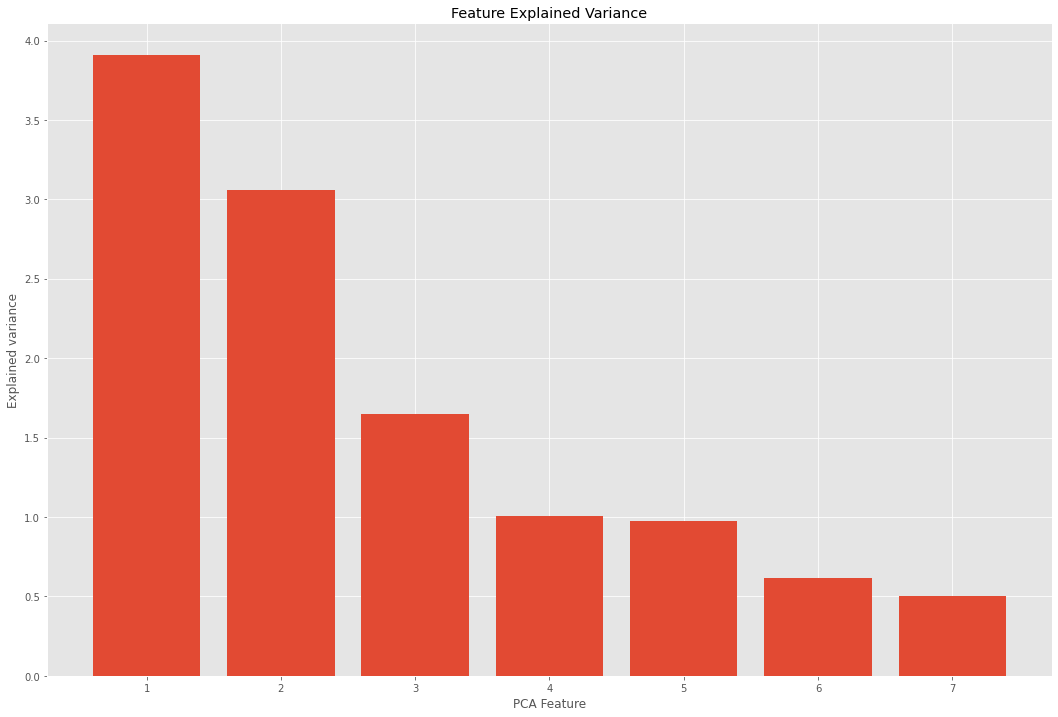

In [49]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [50]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_, columns= X.columns, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']))

      current   voltage  frequency  power_factor    energy  real_power  \
PC1  0.453711  0.102337  -0.011774      0.148125  0.138280    0.453796   
PC2  0.216987 -0.216881   0.014405      0.277184 -0.065269    0.214665   
PC3  0.083275 -0.525130  -0.124799      0.438379 -0.563671    0.061297   
PC4 -0.010034  0.085728  -0.702964     -0.009863  0.158448   -0.008292   
PC5  0.005008  0.046466   0.697742      0.048102  0.008504    0.023724   
PC6  0.033879  0.544007  -0.053886     -0.293532 -0.751133    0.148915   
PC7  0.188572 -0.574077   0.006825     -0.774631 -0.077705    0.051564   

     reactive_power  apparent_power     Month      Year      Week      Hour  
PC1        0.432206        0.475643  0.204442 -0.195425  0.208248 -0.012150  
PC2        0.027615        0.178086 -0.499278  0.502206 -0.492305 -0.046569  
PC3       -0.247828       -0.016772  0.192102 -0.191737  0.190115  0.128690  
PC4        0.023921        0.000002 -0.055534  0.051936 -0.046765  0.681601  
PC5       -0.0268

In [51]:
#*Get column names of most important features*#
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
imp_features = pd.DataFrame(dic.items())

In [52]:
imp_features

0               1
0  PC0  apparent_power
1  PC1            Year
2  PC2          energy
3  PC3       frequency
4  PC4            Hour
5  PC5          energy
6  PC6    power_factor

In [53]:
##Linear Regression

data_l = data.copy()

In [54]:
data_l.reset_index()

timestamp meter_id  current  voltage  frequency  \
0      2022-11-10 20:55:53+01:00   BED201     0.65   219.98      50.17   
1      2022-11-10 20:55:05+01:00   BED201     0.65   219.26      50.14   
2      2022-11-10 20:54:59+01:00   BED201     0.68   220.02      50.15   
3      2022-11-10 20:54:10+01:00   BED201     0.67   220.88      50.19   
4      2022-11-10 20:54:04+01:00   BED201     0.65   221.76      50.17   
...                          ...      ...      ...      ...        ...   
230802 2022-10-24 18:21:12+01:00   IBD217     0.45   219.58      49.83   
230803 2022-10-24 18:20:16+01:00   IBD217     0.45   219.56      49.83   
230804 2022-10-24 18:19:20+01:00   IBD217     0.45   219.82      49.83   
230805 2022-10-24 16:40:10+01:00   IBD217     0.45   220.24      49.82   
230806 2022-10-22 15:55:34+01:00   IBD217     0.45   220.14      49.83   

        power_factor  energy  real_power  reactive_power  apparent_power  ...  \
0               0.88  0.0023      126.60           68.34          143.87  ...   
1               0.89  0.0042      127.23           65.19          142.96  ...   
2               0.86  0.0062      128.29           76.11          149.17  ...   
3               0.88  0.0081      129.45           69.89          147.11  ...   
4               0.89  0.0101      128.29           65.71          144.14  ...   
...              ...     ...         ...             ...             ...  ...   
230802          0.99  0.0101       97.39           13.85           98.37  ...   
230803          0.99  0.0092       97.81           13.95           98.80  ...   
230804          0.99  0.0085       97.49           13.93           98.48  ...   
230805          0.99  0.0073       98.12           13.97           99.11  ...   
230806          0.99  0.0058       97.64           13.87           98.62  ...   

            time day_of_week    load  Month  Year        Date      Time Week  \
0       20:55:53    Thursday  0.0023     11  2022  2022-11-10  20:55:53   45   
1       20:55:05    Thursday  0.0019     11  2022  2022-11-10  20:55:05   45   
2       20:54:59    Thursday  0.0020     11  2022  2022-11-10  20:54:59   45   
3       20:54:10    Thursday  0.0019     11  2022  2022-11-10  20:54:10   45   
4       20:54:04    Thursday  0.0020     11  2022  2022-11-10  20:54:04   45   
...          ...         ...     ...    ...   ...         ...       ...  ...   
230802  18:21:12      Monday  0.0009     10  2022  2022-10-24  18:21:12   43   
230803  18:20:16      Monday  0.0007     10  2022  2022-10-24  18:20:16   43   
230804  18:19:20      Monday  0.0012     10  2022  2022-10-24  18:19:20   43   
230805  16:40:10      Monday  0.0015     10  2022  2022-10-24  16:40:10   43   
230806  15:55:34    Saturday  0.0058     10  2022  2022-10-22  15:55:34   42   

        Hour       Day  
0         20  Thursday  
1         20  Thursday  
2         20  Thursday  
3         20  Thursday  
4         20  Thursday  
...      ...       ...  
230802    18    Monday  
230803    18    Monday  
230804    18    Monday  
230805    16    Monday  
230806    15  Saturday  

[230807 rows x 21 columns]

In [55]:
data_l = data_l.loc[:,['apparent_power', 'energy', 'frequency', 'Year', 'energy', 'power_factor', 'Hour']]
data_l.head() 

apparent_power  energy  frequency  Year  energy  \
timestamp                                                                    
2022-11-10 20:55:53+01:00          143.87  0.0023      50.17  2022  0.0023   
2022-11-10 20:55:05+01:00          142.96  0.0042      50.14  2022  0.0042   
2022-11-10 20:54:59+01:00          149.17  0.0062      50.15  2022  0.0062   
2022-11-10 20:54:10+01:00          147.11  0.0081      50.19  2022  0.0081   
2022-11-10 20:54:04+01:00          144.14  0.0101      50.17  2022  0.0101   

                           power_factor  Hour  
timestamp                                      
2022-11-10 20:55:53+01:00          0.88    20  
2022-11-10 20:55:05+01:00          0.89    20  
2022-11-10 20:54:59+01:00          0.86    20  
2022-11-10 20:54:10+01:00          0.88    20  
2022-11-10 20:54:04+01:00          0.89    20

**(SMA and EMA)**

In [56]:
arima_data = data.loc[:,['date', 'load']]
#arima_data = data.reset_index('date').drop('timestamp')
arima_data

date    load
timestamp                                    
2022-11-10 20:55:53+01:00  11/10/2022  0.0023
2022-11-10 20:55:05+01:00  11/10/2022  0.0019
2022-11-10 20:54:59+01:00  11/10/2022  0.0020
2022-11-10 20:54:10+01:00  11/10/2022  0.0019
2022-11-10 20:54:04+01:00  11/10/2022  0.0020
...                               ...     ...
2022-10-24 18:21:12+01:00  10/24/2022  0.0009
2022-10-24 18:20:16+01:00  10/24/2022  0.0007
2022-10-24 18:19:20+01:00  10/24/2022  0.0012
2022-10-24 16:40:10+01:00  10/24/2022  0.0015
2022-10-22 15:55:34+01:00  10/22/2022  0.0058

[230807 rows x 2 columns]

In [57]:
arima_data = arima_data.reset_index(drop= True)
arima_data = arima_data.set_index('date')

In [58]:
temp_data_213 = data[data.meter_id== 'BED213']
arima_data_213 = temp_data_213.loc[:,['date', 'load']]
#arima_data = data.reset_index('date').drop('timestamp')
arima_data_213 = arima_data_213.reset_index(drop= True)
arima_data_213 = arima_data_213.set_index('date')
arima_data_213.head()

load
date             
2/14/2023  0.0004
2/14/2023  0.0002
2/14/2023  0.0002
2/14/2023  0.0003
2/14/2023  0.0001

In [59]:
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(arima_data_213))
test_size = int(test_ratio * len(arima_data_213))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = arima_data_213[:train_size][['load']]
test = arima_data_213[train_size:][['load']]

train_size: 27893
test_size: 6973


In [60]:
#Calculate the evaluation metrics for analysis

def calculate_perf_metrics(var, logmodelName='Simple MA'):
    ### RMSE 
    rmse = calculate_rmse(np.array(arima_data_213[train_size:]['load']), np.array(arima_data_213[train_size:][var]))
    ### MAPE 
    mape = calculate_mape(np.array(arima_data_213[train_size:]['load']), np.array(arima_data_213[train_size:][var]))

    return rmse, mape

In [61]:
def plot_stock_trend(var, cur_title, stockprices=data, logmodelName='Simple MA'):
    ax = arima_data_213[['load', var,'200day']].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis('tight')
    plt.ylabel('Load')

In [62]:
### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return mape

Root Mean Squared Error for SMA is: 0.0008578944436223199 2
Mean Absolute Percentage Error for SMA is: inf 2


<ipython-input-62-4d0460422882>:14: RuntimeWarning:

divide by zero encountered in divide



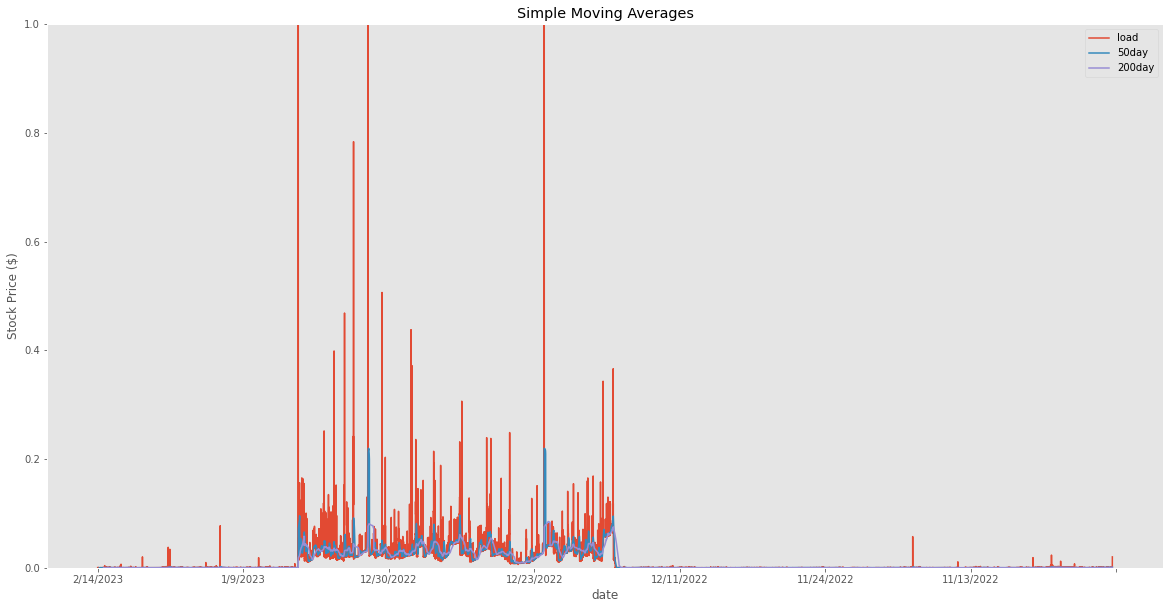

In [63]:
### Include a 200-day SMA for reference 
window_size = 50
window_var = str(window_size) + 'day'
arima_data_213[window_var] = arima_data_213['load'].rolling(window_size).mean()


### Include a 200-day SMA for reference 
arima_data_213['200day'] = arima_data_213['load'].rolling(200).mean()

### Plot and performance metrics for SMA model
plot_stock_trend(var=window_var, cur_title='Simple Moving Averages', logmodelName='Simple MA')
rmse_sma, mape_sma= calculate_perf_metrics(var=window_var, logmodelName='Simple MA')
plt.ylim(top=1)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0)

print('Root Mean Squared Error for SMA is:', rmse_sma, 2)
print('Mean Absolute Percentage Error for SMA is:', mape_sma, 2)

<ipython-input-62-4d0460422882>:14: RuntimeWarning:

divide by zero encountered in divide



Root Mean Squared Error for EMA is: 0.0008374991831388043 2
Mean Absolute Percentage Error for EMA is: inf 2


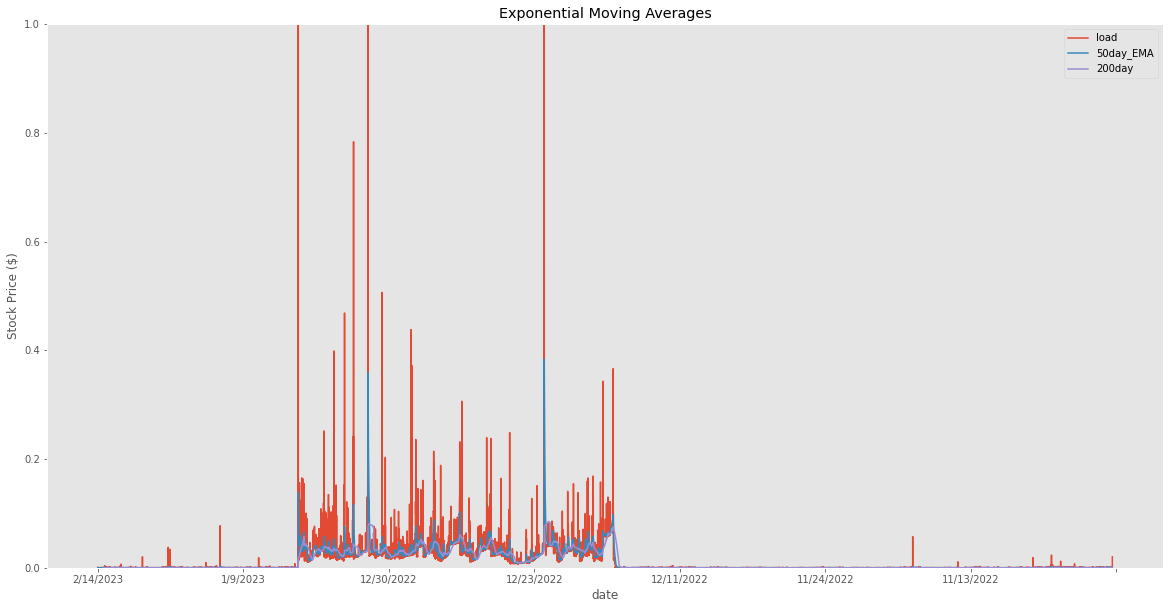

In [64]:
###### Exponential MA
window_ema_var = window_var+'_EMA'
# Calculate the 50-day exponentially weighted moving average
arima_data_213[window_ema_var] = arima_data_213['load'].ewm(span=window_size, adjust=False).mean()
arima_data_213['200day'] = arima_data_213['load'].rolling(200).mean()

### Plot and performance metrics for EMA model
plot_stock_trend(var=window_ema_var, cur_title='Exponential Moving Averages', logmodelName='Exp MA')
rmse_ema, mape_ema = calculate_perf_metrics(var=window_ema_var, logmodelName='Exp MA')
plt.ylim(top=1)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0)


print('Root Mean Squared Error for EMA is:', rmse_ema, 2)
print('Mean Absolute Percentage Error for EMA is:', mape_ema, 2)

ARIMA

In [65]:
arima_df = data.loc[:,['date', 'load']]
arima_df = arima_df.reset_index(drop= True)
electricity_data = arima_df.set_index('date')
electricity_data.head()

load
date              
11/10/2022  0.0023
11/10/2022  0.0019
11/10/2022  0.0020
11/10/2022  0.0019
11/10/2022  0.0020

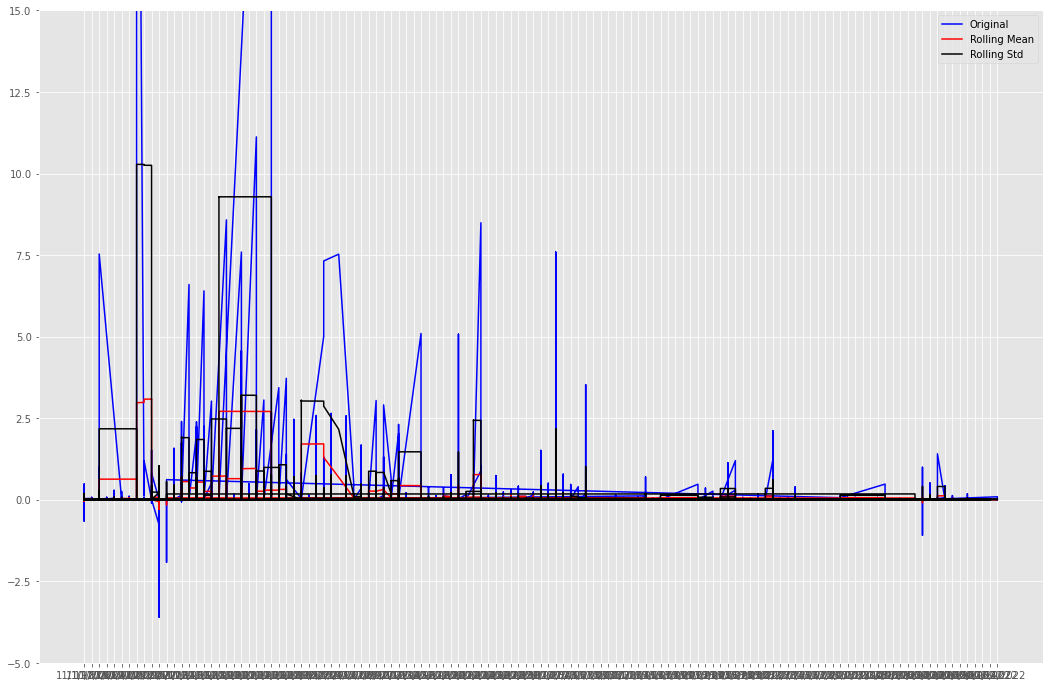

Results of Dickey-Fuller Test:
Test Statistic                    -48.883604
p-value                             0.000000
#Lags Used                         70.000000
Number of Observations Used    230736.000000
Critical Value (1%)                -3.430378
Critical Value (5%)                -2.861553
Critical Value (10%)               -2.566777
dtype: float64


In [66]:
from statsmodels.tsa.stattools import adfuller

# Define function to perform the Dickey-Fuller test
def test_stationarity(timeseries):
    
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.ylim(top=15)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-5)

    plt.legend()
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Perform the Dickey-Fuller test on the electricity data
test_stationarity(electricity_data)


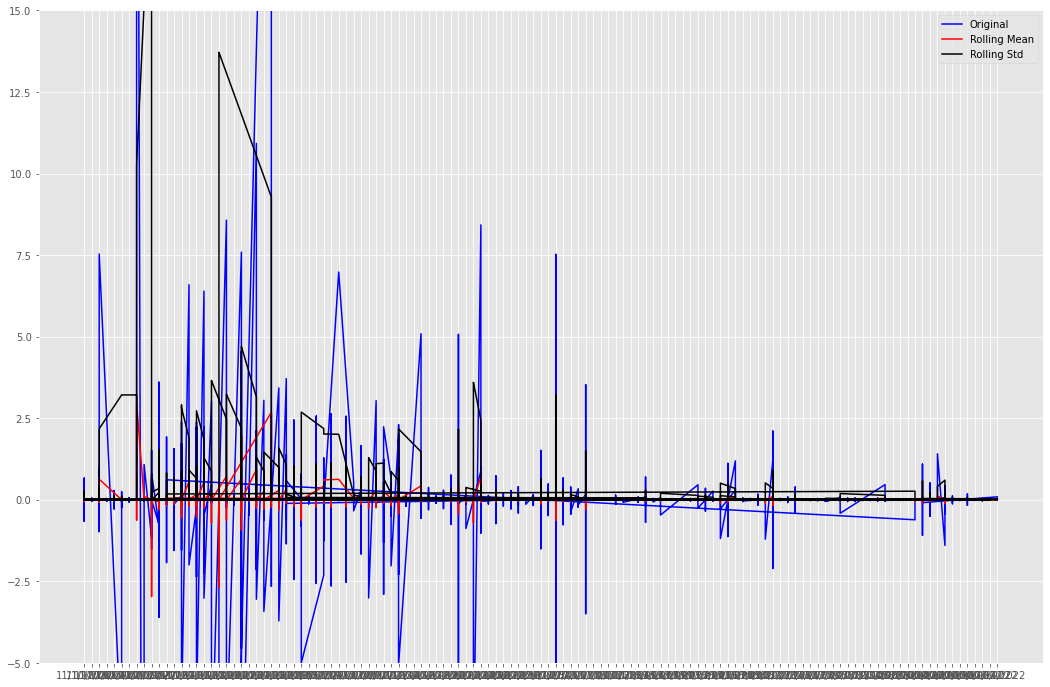

Results of Dickey-Fuller Test:
Test Statistic                    -89.539929
p-value                             0.000000
#Lags Used                         84.000000
Number of Observations Used    230721.000000
Critical Value (1%)                -3.430378
Critical Value (5%)                -2.861553
Critical Value (10%)               -2.566777
dtype: float64


In [67]:
# Calculate the first difference of the electricity data
electricity_data_diff = electricity_data.diff().dropna()

# Check if the first difference is stationary
test_stationarity(electricity_data_diff)

In [68]:
import statsmodels.api as sm

# Fit an ARIMA model with order (p, d, q) = (1, 1, 1)
model = sm.tsa.ARIMA(electricity_data_diff, order=(1, 1, 1))
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency informatio

                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:               230806
Model:                 ARIMA(1, 1, 1)   Log Likelihood              119379.380
Date:                Thu, 23 Mar 2023   AIC                        -238752.761
Time:                        19:21:00   BIC                        -238721.713
Sample:                             0   HQIC                       -238743.679
                             - 230806                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4957   1.96e-05  -2.53e+04      0.000      -0.496      -0.496
ma.L1         -1.0000      0.000  -3958.643      0.000      -1.000      -0.999
sigma2         0.0208   4.92e-06   4231.925      0.0

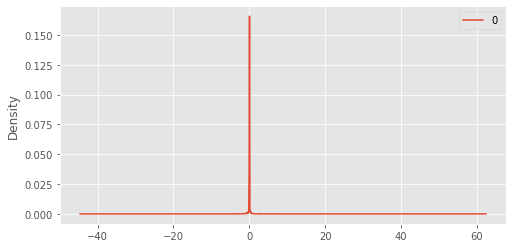

In [69]:
# Plot the residuals to check for any remaining patterns or trends
residuals = pd.DataFrame(results.resid)
residuals.plot(kind='kde', figsize=(8, 4))
plt.show()

In [73]:
# Forecast future values of the electricity data using the ARIMA model
#forecast = results.forecast(steps=12)
#forecast = pd.DataFrame(forecast[0], index=pd.date_range(start='2022-10-01', periods=1, freq='M'))
# Plot the forecasted values
#plt.plot(data, label='Actual')
#plt.plot(forecast, label='Forecast')
#plt.legend()
#plt.show()

LSTM

In [74]:
layer_units, optimizer = 50, 'adam'
cur_epochs = 15
cur_batch_size = 20

cur_LSTM_pars = {'units': layer_units,
                     'optimizer': optimizer,
                     'batch_size': cur_batch_size,
                     'epochs': cur_epochs
                     }

In [75]:
## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []

    for i in range(offset, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])

    return np.array(X), np.array(y)

In [76]:
#**scale our dataset***
scaler = StandardScaler()
scaled_data = scaler.fit_transform(arima_data_213[['load']])
scaled_data_train = scaled_data[:train.shape[0]]

# We use past 50 days’ stock prices for our training to predict the 51th day's closing price.
X_train, y_train = extract_seqX_outcomeY(scaled_data_train, window_size, window_size)

In [77]:
inp = (X_train.shape[1], 1)
inp

(50, 1)

In [78]:
## Build a LSTM model###   
from keras.layers import LSTM, Dense, Input
from keras.models import Model

def Run_LSTM(X_train, layer_units=50):     
        inp = Input(shape=(X_train.shape[1], 1))
        
        x = LSTM(units=layer_units, return_sequences=True)(inp)
        x = LSTM(units=layer_units)(x)
        out = Dense(1, activation='linear')(x)
        model = Model(inp, out)
        
        # Compile the LSTM neural net
        model.compile(loss = 'mean_squared_error', optimizer = 'adam')
            
        return model


model = Run_LSTM(X_train)

history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size,
                    verbose=1, validation_split=0.1, shuffle=True)
model        

Epoch 1/15
1253/1253 [==============================] - 82s 58ms/step - loss: 1.2826 - val_loss: 1.0875e-05
Epoch 2/15
1253/1253 [==============================] - 77s 61ms/step - loss: 1.2821 - val_loss: 0.0012
Epoch 3/15
1253/1253 [==============================] - 93s 74ms/step - loss: 1.2791 - val_loss: 1.7956e-06
Epoch 4/15
1253/1253 [==============================] - 78s 62ms/step - loss: 1.2784 - val_loss: 2.1670e-05
Epoch 5/15
1253/1253 [==============================] - 76s 61ms/step - loss: 1.2793 - val_loss: 4.7911e-05
Epoch 6/15
1253/1253 [==============================] - 75s 60ms/step - loss: 1.2779 - val_loss: 2.4352e-05
Epoch 7/15
1253/1253 [==============================] - 78s 62ms/step - loss: 1.2771 - val_loss: 2.7793e-05
Epoch 8/15
1253/1253 [==============================] - 83s 66ms/step - loss: 1.2765 - val_loss: 1.2662e-04
Epoch 9/15
1253/1253 [==============================] - 78s 63ms/step - loss: 1.2762 - val_loss: 3.0746e-05
Epoch 10/15
1253/1253 [=========

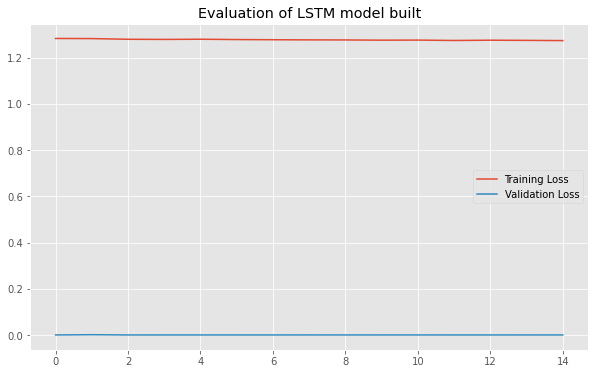

In [79]:
# plot training loss and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.legend()
plt.title('Evaluation of LSTM model built')
plt.show()

In [80]:
# predict stock prices using past window_size stock prices
def preprocess_testdat(data= arima_data_213, scaler=scaler, window_size=window_size, test=test):
    raw = arima_data_213['load'][len(data) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)

    X_test = []
    for i in range(window_size, raw.shape[0]):
        X_test.append(raw[i-window_size:i, 0])

    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

X_test = preprocess_testdat()

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# Plot predicted price vs actual closing price 
test['Predictions_lstm'] = predicted_price

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



218/218 [==============================] - 5s 18ms/step


Root Mean Squared Error for LSTM is: 0.001028089742367102 2
Mean Absolute Percentage Error for LSTM is: inf 2


<ipython-input-62-4d0460422882>:14: RuntimeWarning:

divide by zero encountered in divide



(0.0, 0.2)

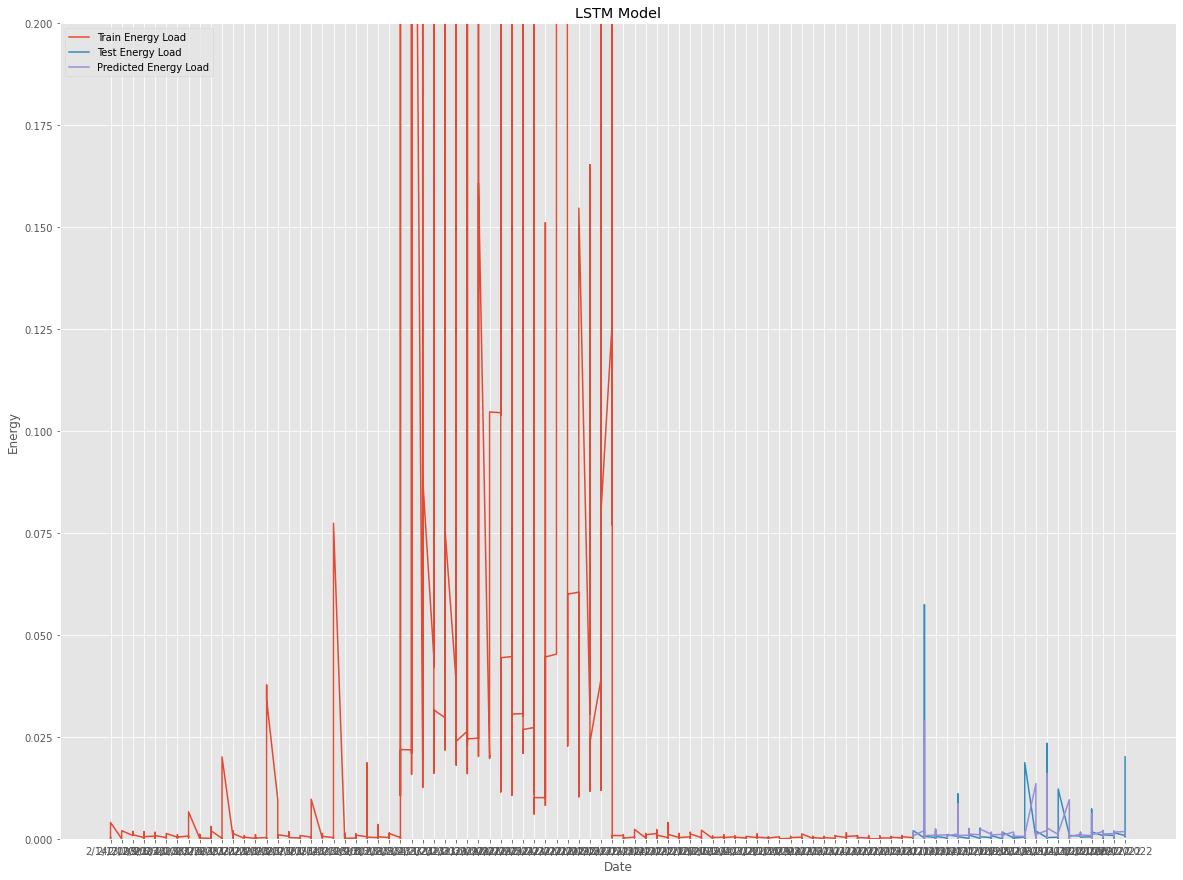

In [81]:
# Evaluate performance
rmse_lstm = calculate_rmse(np.array(test['load']), np.array(test['Predictions_lstm']))
mape_lstm = calculate_mape(np.array(test['load']), np.array(test['Predictions_lstm']))


### Plot prediction and true trends and log to Neptune         
def plot_stock_trend_lstm(train, test):
    fig = plt.figure(figsize = (20,15))
    plt.plot( train['load'], label = 'Train Energy Load')
    plt.plot(test['load'], label = 'Test Energy Load')
    plt.plot( test['Predictions_lstm'], label = 'Predicted Energy Load')
    plt.title('LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Energy')
    plt.legend(loc="upper left")


print('Root Mean Squared Error for LSTM is:', rmse_lstm, 2)
print('Mean Absolute Percentage Error for LSTM is:', mape_lstm, 2)
plot_stock_trend_lstm(train, test)

plt.ylim(top=0.2)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0)

**CNN**

In [82]:
arima_data_cnn = data.loc[:,['apparent_power', 'Year', 'energy', 'frequency', 'Hour', 'energy', 'power_factor', 'date']]
arima_data_cnn = arima_data_cnn.reset_index(drop= True)
arima_data_cnn = arima_data_cnn.set_index('date')
arima_data_cnn.head()

apparent_power  Year  energy  frequency  Hour  energy  \
date                                                                
11/10/2022          143.87  2022  0.0023      50.17    20  0.0023   
11/10/2022          142.96  2022  0.0042      50.14    20  0.0042   
11/10/2022          149.17  2022  0.0062      50.15    20  0.0062   
11/10/2022          147.11  2022  0.0081      50.19    20  0.0081   
11/10/2022          144.14  2022  0.0101      50.17    20  0.0101   

            power_factor  
date                      
11/10/2022          0.88  
11/10/2022          0.89  
11/10/2022          0.86  
11/10/2022          0.88  
11/10/2022          0.89

In [83]:
from sklearn.model_selection import train_test_split

X=[]
Y=[]

window_size = 100
for i in range(1, len(arima_data_cnn)- window_size-1, 1):
  first = arima_data_cnn.iloc[i,0]
  temp = []
  temp2= []
  for j in range(window_size):
    temp.append(arima_data_cnn.iloc[i+j,0] - first/first)
  temp2.append(arima_data_cnn.iloc[i+window_size,0] - first/first)
  X.append(np.array(temp).reshape(100,1))
  Y.append(np.array(temp2).reshape(1,1))  

print(len(X))
print(len(Y))

X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size= 0.2, shuffle=True)

x_train = np.array(X_train)
x_test = np.array(X_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

X_train = x_train.reshape(x_train.shape[0], 100)
X_test = x_test.reshape(x_test.shape[0], 100)
y_train = Y_train.reshape(Y_train.shape[0])
y_test = Y_test.reshape(Y_test.shape[0])

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

230705
230705
184564
46141
184564
46141


In [84]:
X_train = X_train.reshape(X_train.shape[0], 100,1)
X_test = X_test.reshape(X_test.shape[0], 100,1)

In [85]:
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from sklearn import metrics

from keras.layers.pooling.max_pooling3d import MaxPooling3D
from tensorflow.keras.layers import Convolution1D, Dense, Dropout, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import MaxPooling1D, Flatten
from keras.models import Sequential
from keras.layers import Dense

model =tf.keras.Sequential()

model.add(Convolution1D(64, kernel_size=1, activation='relu', input_shape=(100,1)))

model.add(Convolution1D(128, kernel_size=1, activation='relu'))
model.add(Convolution1D(64, kernel_size=1, activation='relu'))

model.add(MaxPooling1D(2))

model.summary() #Print model Summary


model.add(Dropout(0.5))
#Final Layer
model.add(Flatten())
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(X_train, y_train, epochs=15, batch_size=200,
                    verbose=1, validation_split=0.1, shuffle=True)      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 64)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 128)          8320      
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 64)           8256      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
831/831 [==============================] - 84s 100ms/step - loss: 70986.2344 - mse: 70986.2344 - mae: 126.7

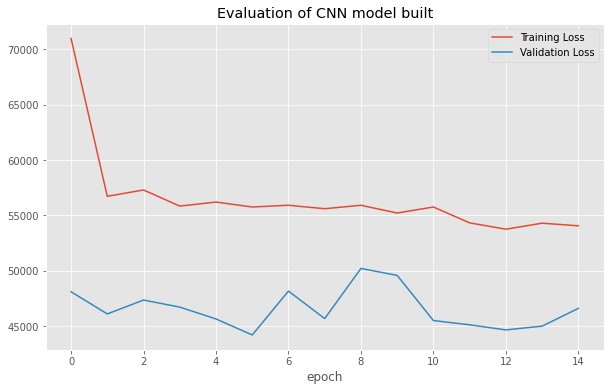

In [86]:
# plot training loss and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.legend()
plt.xlabel('epoch')
plt.title('Evaluation of CNN model built')
plt.show()

In [87]:
pred_train= model.predict(X_train)
print((mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

5768/5768 [==============================] - 32s 6ms/step
45113.01467450924
1442/1442 [==============================] - 9s 6ms/step
213.77742948809413


In [88]:
arima_data_cnn.index

Index(['11/10/2022', '11/10/2022', '11/10/2022', '11/10/2022', '11/10/2022',
       '11/10/2022', '11/10/2022', '11/10/2022', '11/10/2022', '11/10/2022',
       ...
       '10/24/2022', '10/24/2022', '10/24/2022', '10/24/2022', '10/24/2022',
       '10/24/2022', '10/24/2022', '10/24/2022', '10/24/2022', '10/22/2022'],
      dtype='object', name='date', length=230807)

In [89]:
df_pred = pd.DataFrame(y_test, columns=['Actual'])
df_pred['Predicted'] = pred
df_pred['extra'] = df_pred.index
#df_pred = df_pred.reset_index()
#df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'], dayfirst=True)
df_pred

Actual   Predicted  extra
0       53.83   60.315933      0
1      493.28  452.463470      1
2      579.04  536.614929      2
3      705.75  689.027161      3
4      447.79  421.215424      4
...       ...         ...    ...
46136  347.06  390.320465  46136
46137  824.40  761.780945  46137
46138  566.73  523.816040  46138
46139  226.02  492.462799  46139
46140  534.74  502.960297  46140

[46141 rows x 3 columns]

<Axes: >

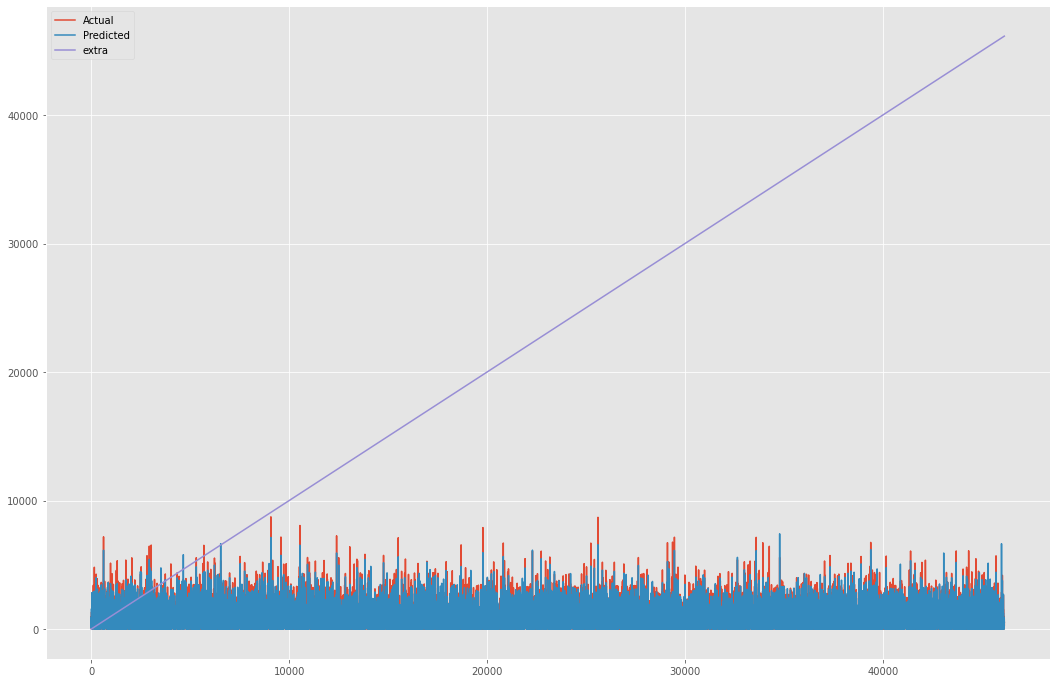

In [90]:
df_pred.plot()

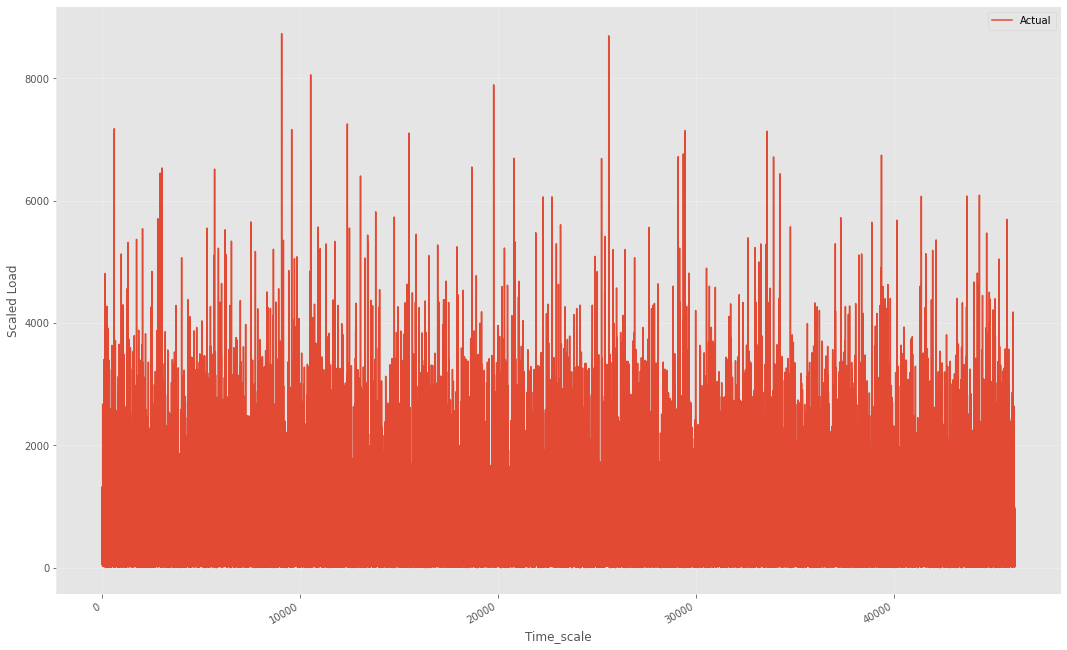

In [91]:
plt.plot(df_pred['extra'], df_pred['Actual'], label='Actual')
#plt.plot(df_pred['extra'], df_pred['Predicted'], label='Predicted')
plt.xlabel('Time_scale')
plt.ylabel('Scaled Load')
plt.legend()
plt.gcf().autofmt_xdate()

plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)

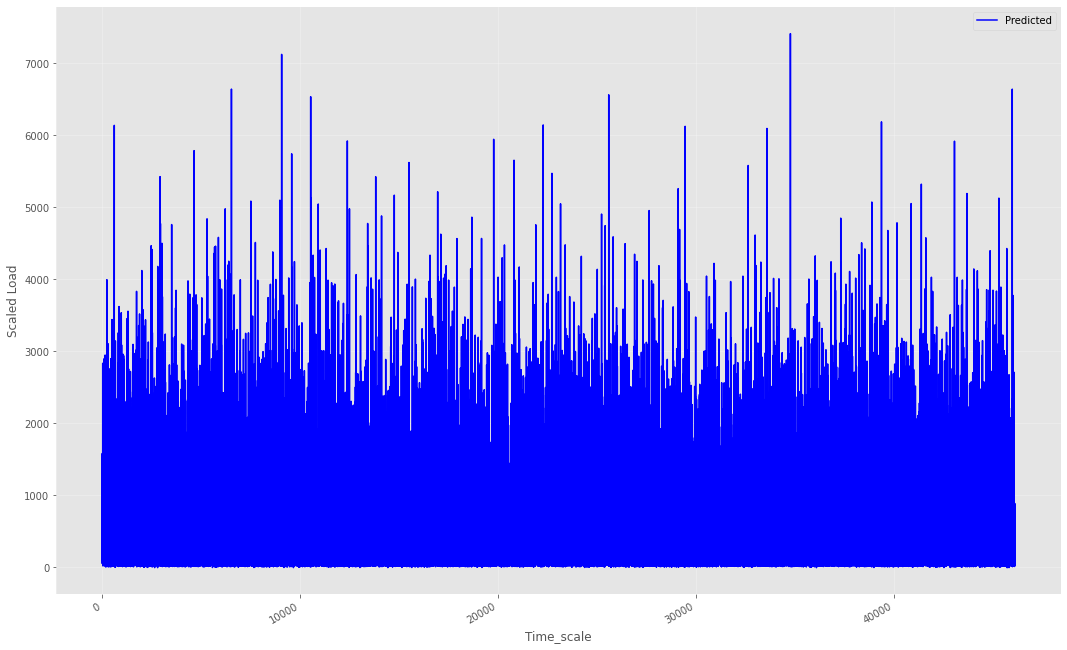

In [92]:
#plt.plot(df_pred['extra'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['extra'], df_pred['Predicted'], label='Predicted', color='b')
plt.xlabel('Time_scale')
plt.ylabel('Scaled Load')
plt.legend()
plt.gcf().autofmt_xdate()

plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()